# CONCLUSION BASIS OF FOLLOWING ANALYSIS

* The data consists of 1000 rows 10 columns. [line 11]

* After checking info of the data all the parameters are of numerical form. [Line 9]

* After checking with isnull() function no null values present even checked with heatmap od isnull feature. [Line 12 & 16]

* No outliers present in dataset [line 18 & 22]

* Target variable(SalePrice) seems equally distributed [line 27]

* Expected that larger living area (GrLivArea) will increase the price but some houses are offering less price with larger living area. Because of larger Squarefeet area(TotalBsmtSf) of Basement.[Line 26]

* Conclusion- Basement area might to be considered for model.[line 28]

* Overall quality which includes material quality and finishing can impact more on house price.[Line 30 & 34]

* Heatmap for correlation which gives clear insight for till which extent two variables are linearly related [line 36 & 39]

* Pair plot gives the each and every parameter vs SalePrice visualization under single plot from which we can easily prepare list of ML algoriths which we can use for the data.

* Lets jump to the train test split where we are using SalePrice as our Target variable [Line 44,45,55]

#Model Discussion
* Linear regression model assumes that the relationship between dependent continuous variable and one or more independent variables.
* Even Random Forest model could be considered for same data set for expectations of High accuracy

#####CONCLUSIONS & SUGGETIONS#####

* If the overall quality,living area,yearbuilt, Garage Area will impact more on Sale price of Home. 
* If the Overall quality should be focused more The price of the house could be increase.
* Total basement area could be minimise to get good profit.
* As other parameters are missing like Tax polices,Area,Distance from Metro/Airport could also play vital role in House price prediction.



In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline   
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r"C:\Users\prana\OneDrive\Desktop\Interview\sample_dataset (2).csv") #we are using "r"before file address as the file address contains '/' so pd could read it

In [5]:
df.head() #reading first 5 rows of dataset{default no of rows 5}

,ID,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
0,1,5,629,2022,702,1,0,3,627,457528
1,2,2,2402,1972,251,1,1,3,705,78691
2,3,7,1547,1968,1224,3,0,1,282,316056
3,4,1,666,1937,2890,4,1,3,39,213285
4,5,9,2946,1985,768,2,1,4,848,304717


In [6]:
df.tail() #reading bottom 5 rows of dataset{default no of rows 5}

,ID,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
995,996,2,863,1947,1381,4,1,4,58,258966
996,997,8,1392,1963,203,2,0,1,553,348957
997,998,2,921,2005,1705,3,0,0,600,233760
998,999,8,3252,1930,3016,4,2,4,203,394155
999,1000,9,3336,1953,1961,2,0,2,26,214000


# EDA

In [7]:
df.describe() #describe function shows the mean median mode for numerical columns

,ID,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,5.61700,1996.309000,1960.760000,1740.401000,2.506000,0.994000,2.038000,484.786000,270963.885000
std,288.819436,2.92076,883.054538,35.169351,1007.061464,1.135453,0.809085,1.406604,282.732658,129264.336981
min,1.000000,1.00000,500.000000,1900.000000,0.000000,1.000000,0.000000,0.000000,0.000000,50363.000000
25%,250.750000,3.00000,1223.750000,1931.000000,838.750000,1.000000,0.000000,1.000000,239.000000,157806.750000
50%,500.500000,6.00000,1966.000000,1963.000000,1733.000000,3.000000,1.000000,2.000000,500.000000,268642.500000
75%,750.250000,8.00000,2800.000000,1991.000000,2599.500000,4.000000,2.000000,3.000000,705.500000,385333.250000
max,1000.000000,10.00000,3499.000000,2022.000000,3499.000000,4.000000,2.000000,4.000000,1000.000000,499208.000000


In [9]:
df.info() # info() gives detail overview of the dataset like numerical?cat columns as well as no. of nulls present in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           1000 non-null   int64
 1   OverallQual  1000 non-null   int64
 2   GrLivArea    1000 non-null   int64
 3   YearBuilt    1000 non-null   int64
 4   TotalBsmtSF  1000 non-null   int64
 5   FullBath     1000 non-null   int64
 6   HalfBath     1000 non-null   int64
 7   GarageCars   1000 non-null   int64
 8   GarageArea   1000 non-null   int64
 9   SalePrice    1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


In [10]:
#seems all data types of columns are numerical and non-Null count is zero

In [11]:
df.shape#gives total no of rows and columns

(1000, 10)

In [12]:
dups = df.duplicated()                             
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]    #to get sum of all duplicate columns

Number of duplicate rows = 0


,ID,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice


In [13]:
# No duplicate rows

In [14]:
df.isnull() #isnull() function show is there null/NA values present in dataset or not in the form of boolean output false=no & true = yes 

,ID,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [15]:
#we can find missing values by using heat map easily 

<AxesSubplot:>

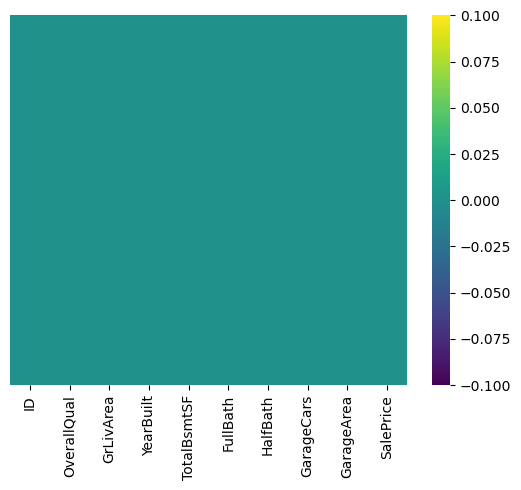

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis') #here by making cmap='virdis' will show color strip only for true values means only missing values in our case in yellow color

In [81]:
df.drop(['ID'], axis=1,inplace=True) # droping of ID column

KeyError: "['ID'] not found in axis"

# Checking for outliers

<AxesSubplot:>

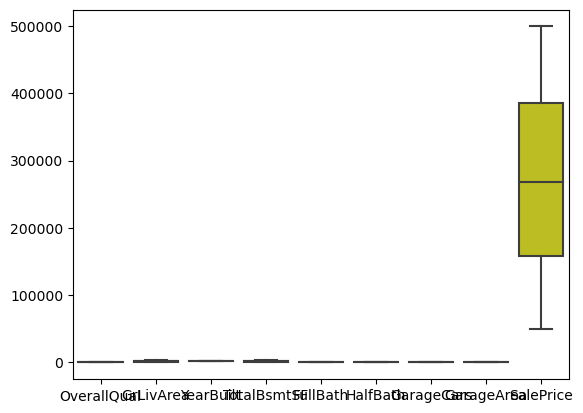

In [18]:
sns.boxplot(data=df,saturation=1,width=0.80,fliersize=10)# boxplot give the presence of outlier in columns{no outlirs here}

In [19]:
#seems not getting clear idea from above plot so will try with cufflinks liabrary

In [21]:
import cufflinks as cf
cf.go_offline()

In [22]:
df.iplot(kind='box') #if we put cursor on the plot it gives deatil information about the paramaeter

In [25]:
df["SalePrice"].iplot(kind="histogram", bins=10, theme="white")

D:\PRANAV DATA SCIENCE\HACKATHON\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

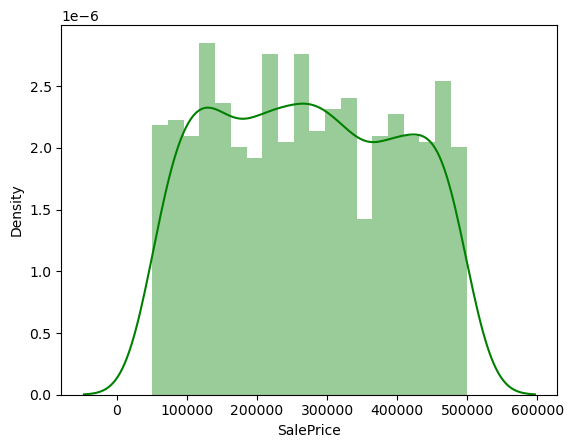

In [27]:
sns.distplot(df.SalePrice,bins=20,color='Green')  #looks like bellcurve & bins= no of equal width bins for given range

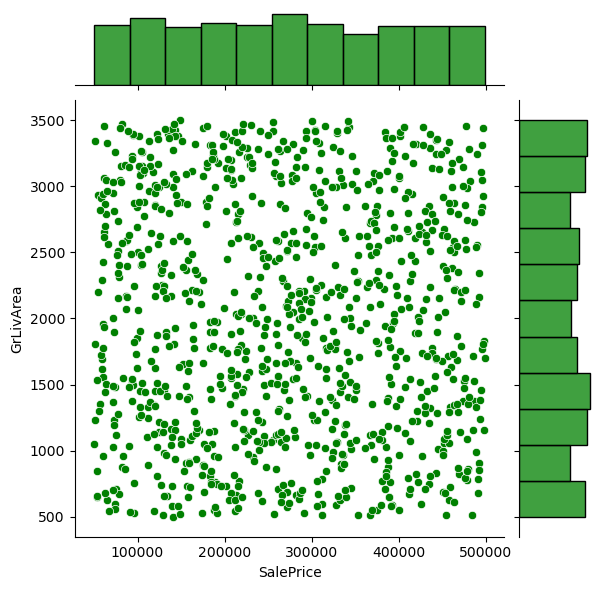

In [26]:
sns.jointplot(x='SalePrice',y='GrLivArea',data=df,color='green')

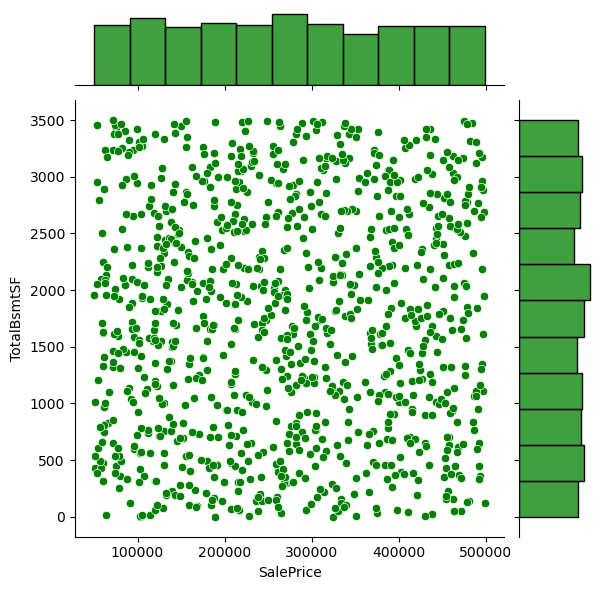

In [28]:
sns.jointplot(x='SalePrice',y='TotalBsmtSF',data=df,color='green')

In [30]:
df.iplot(kind='box', x='SalePrice',y='OverallQual')

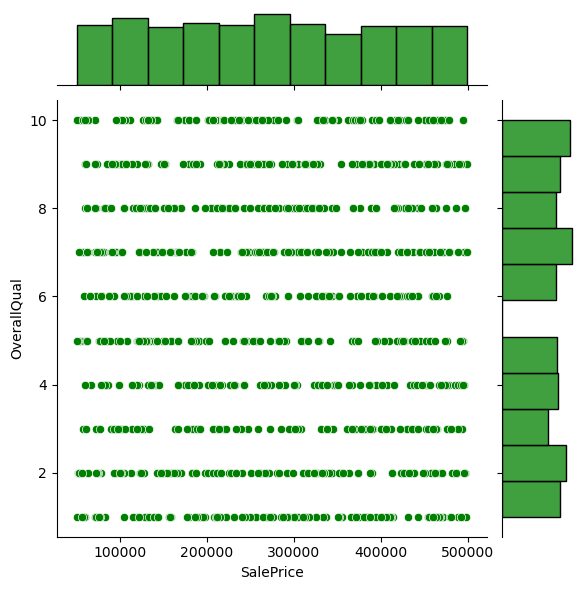

In [34]:
sns.jointplot(x="SalePrice", y="OverallQual", data=df,color='Green')

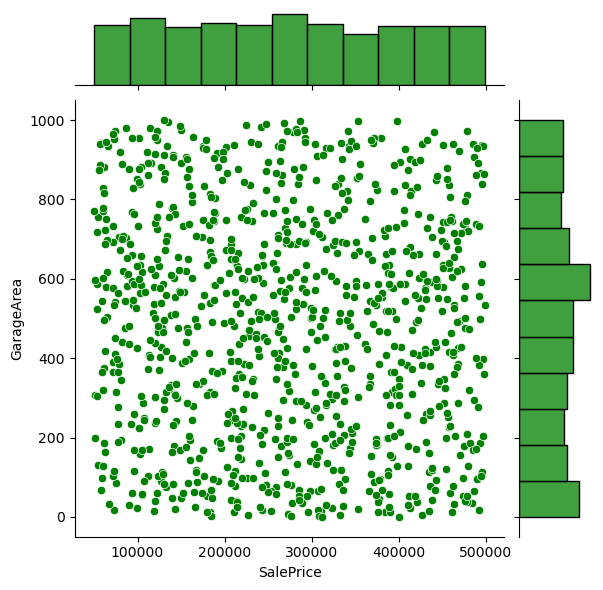

In [33]:
sns.jointplot(x='SalePrice',y='GarageArea',data=df,color='green')

# Bi-VAriate Analysis

In [35]:
df.corr() #correlation gives the till which extent two variables are linearly related

,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.054348,-0.047398,-0.027117,-0.026321,0.009616,0.001110,-0.019213,-0.023987
GrLivArea,0.054348,1.000000,-0.001860,-0.043779,0.060206,0.045500,0.030373,0.046051,-0.022882
YearBuilt,-0.047398,-0.001860,1.000000,0.051829,0.000738,0.050184,-0.001940,0.025297,-0.004240
TotalBsmtSF,-0.027117,-0.043779,0.051829,1.000000,0.017190,0.037160,0.006063,0.025627,0.031701
FullBath,-0.026321,0.060206,0.000738,0.017190,1.000000,0.030548,0.016779,-0.021539,0.009416
HalfBath,0.009616,0.045500,0.050184,0.037160,0.030548,1.000000,0.031865,0.039001,-0.009761
GarageCars,0.001110,0.030373,-0.001940,0.006063,0.016779,0.031865,1.000000,0.026021,0.024781
GarageArea,-0.019213,0.046051,0.025297,0.025627,-0.021539,0.039001,0.026021,1.000000,-0.051827
SalePrice,-0.023987,-0.022882,-0.004240,0.031701,0.009416,-0.009761,0.024781,-0.051827,1.000000


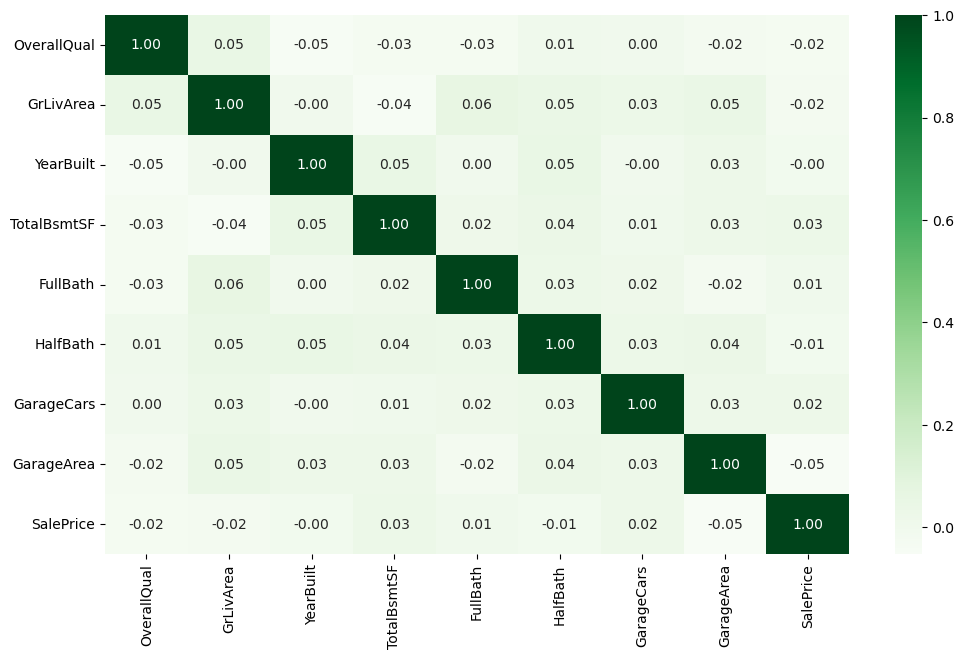

In [36]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Greens')
plt.show()

In [39]:
df.iplot(kind='heatmap',colorscale='Greens')

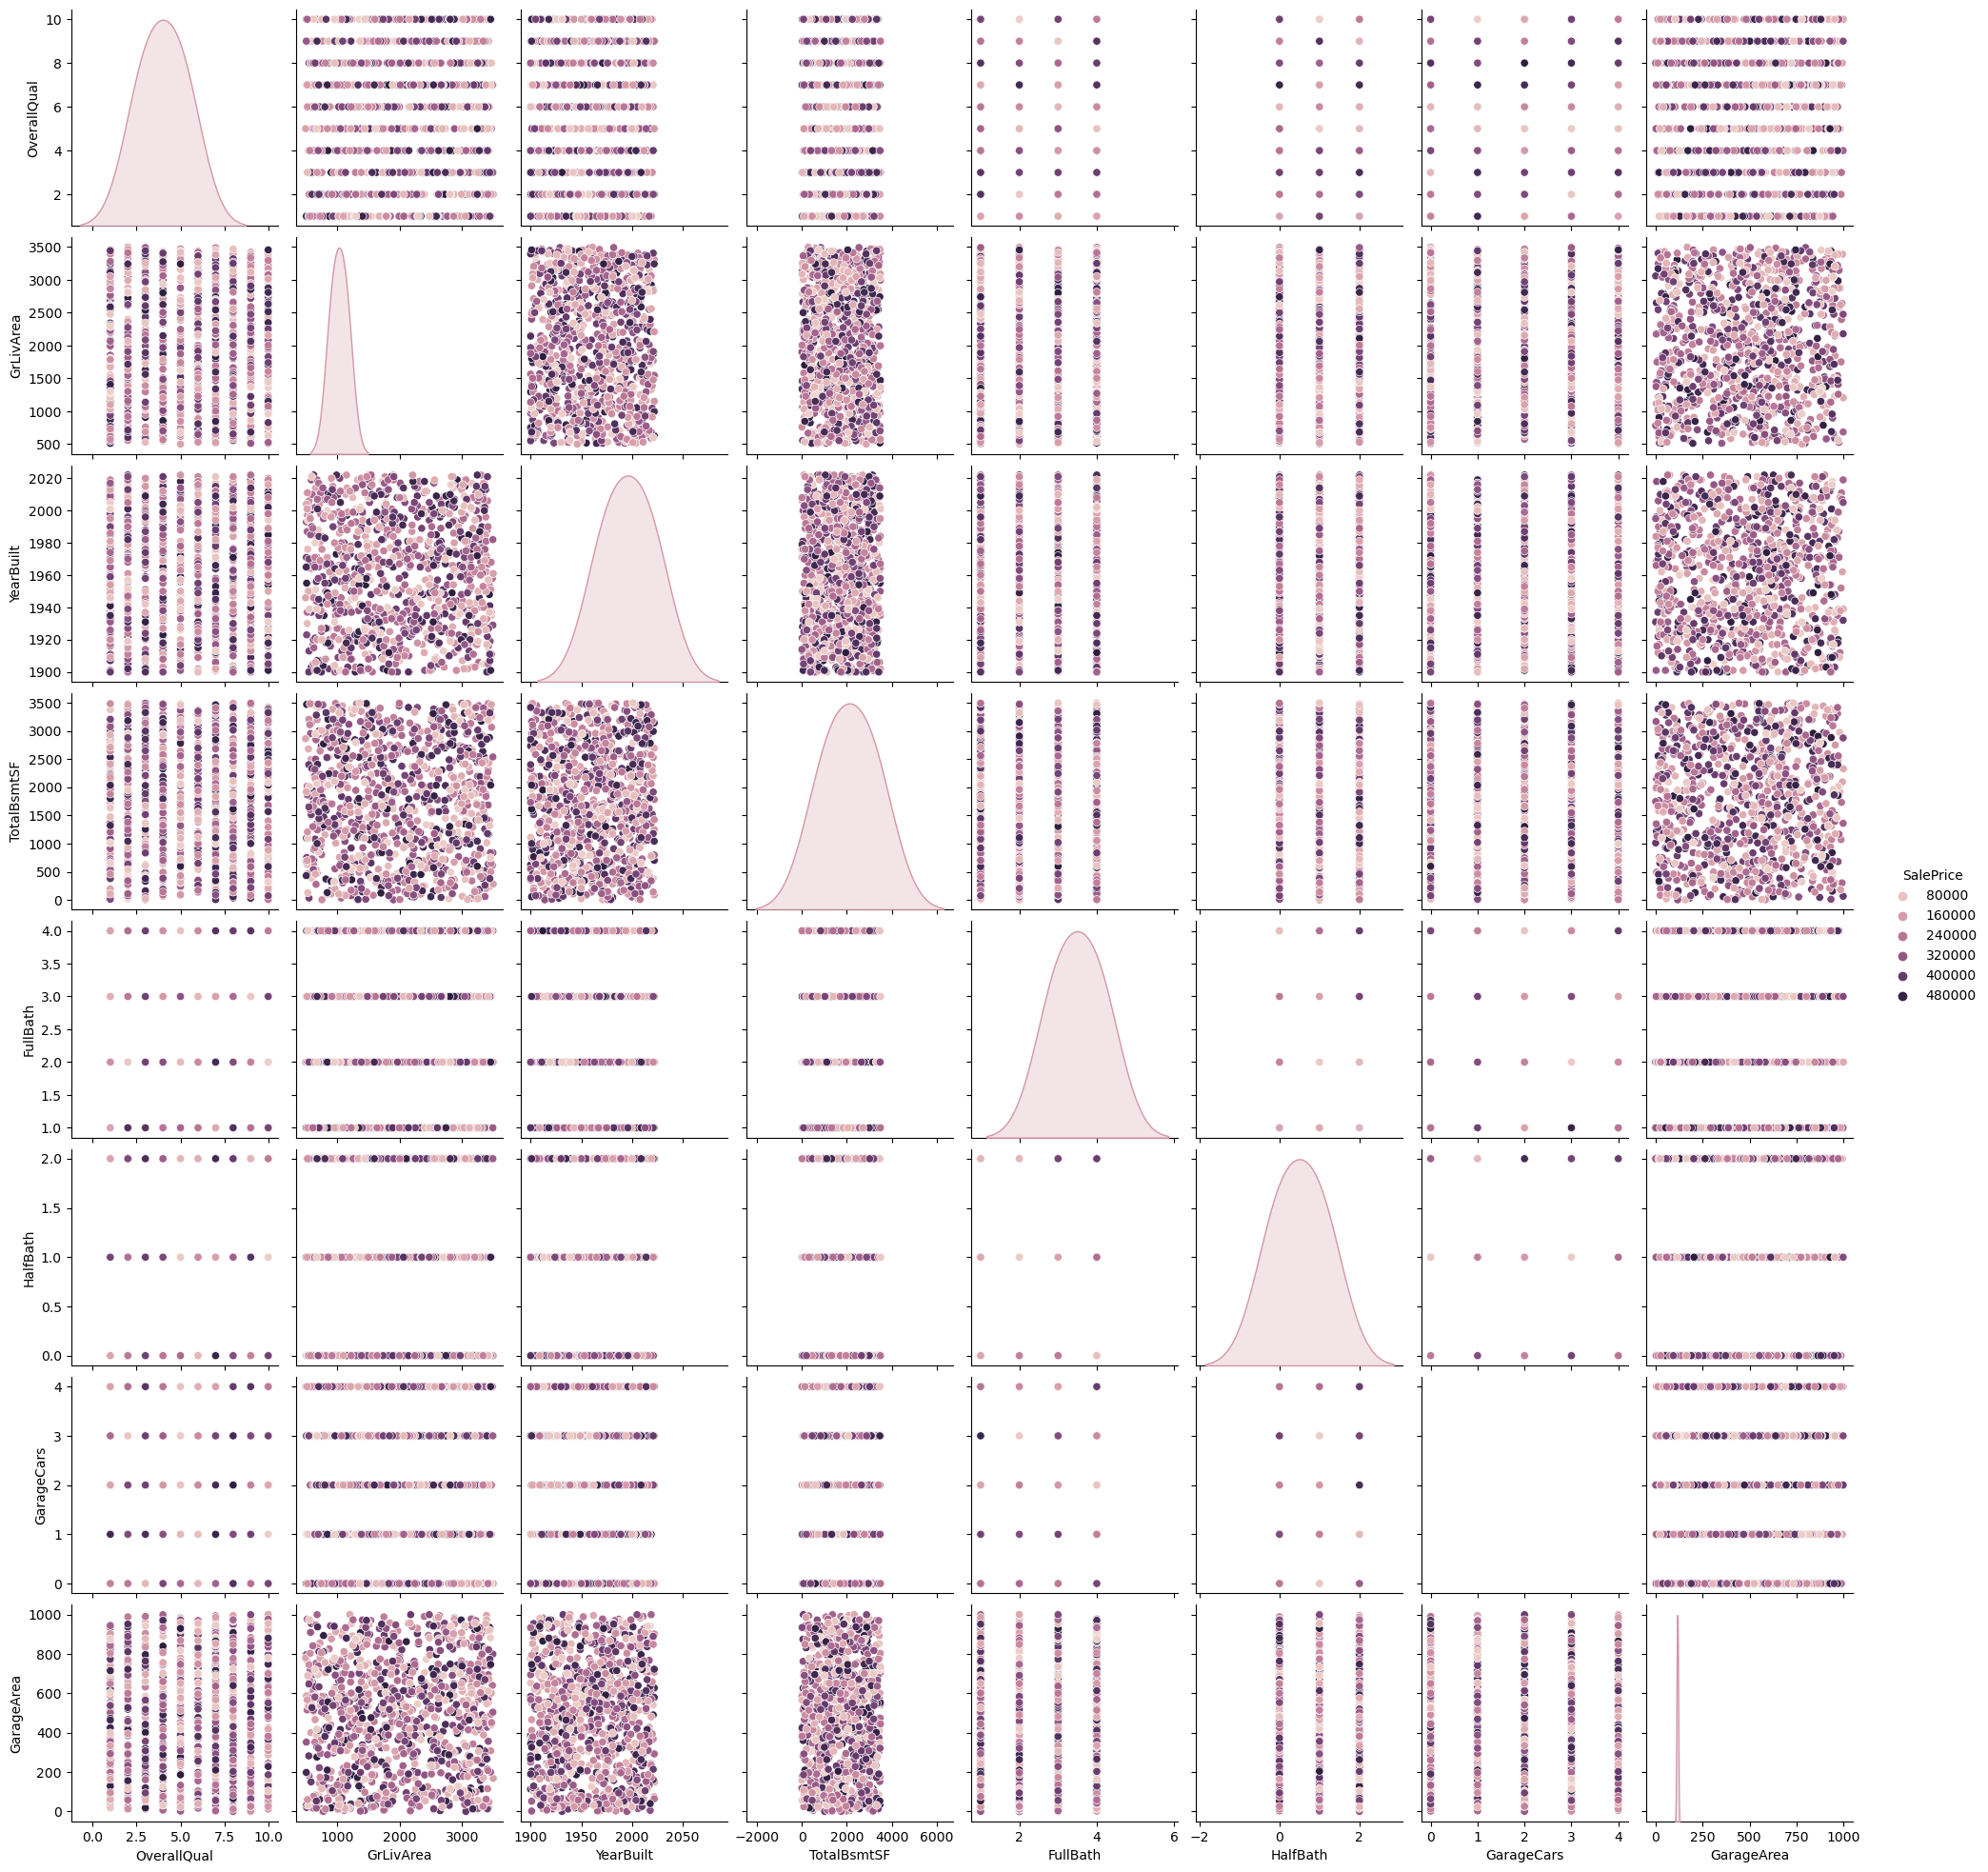

In [40]:
sns.pairplot(df,hue='SalePrice') #it gives clear vision of target variable "SalePrice" vs all other parameters

In [42]:
df.columns

Index(['OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

In [43]:
X=df[['OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'GarageCars', 'GarageArea']]

In [44]:
y=df['SalePrice']

In [45]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lm = LinearRegression()


In [80]:
lm.fit(X_train,y_train)

LinearRegression()

In [59]:
print(lm.intercept_)

358936.6722947671


In [60]:
lm.coef_

array([-1.45996186e+03, -6.89223142e+00, -4.22157799e+01,  1.92540147e+00,
        3.06552316e+03,  1.16052728e+03,  4.95320780e+03, -2.04772257e+01])

In [61]:
X_train.columns

Index(['OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'GarageCars', 'GarageArea'],
      dtype='object')

In [62]:
sdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])


In [63]:
sdf

,Coeff
OverallQual,-1459.961856
GrLivArea,-6.892231
YearBuilt,-42.215780
TotalBsmtSF,1.925401
FullBath,3065.523165
HalfBath,1160.527280
GarageCars,4953.207803
GarageArea,-20.477226


In [68]:
predictions = lm.predict(X_test)

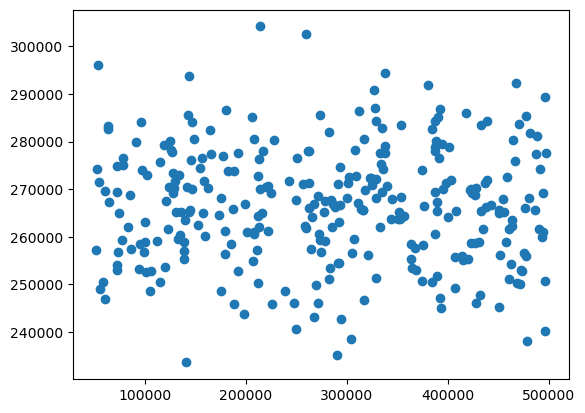

In [72]:
plt.scatter(y_test,predictions)

In [73]:
from sklearn import metrics

In [74]:
print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 113644.49347525972
MSE 17365060886.823326
RMSE 131776.55666628768


In [75]:
metrics.explained_variance_score(y_test,predictions)

-0.011661979526141675

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

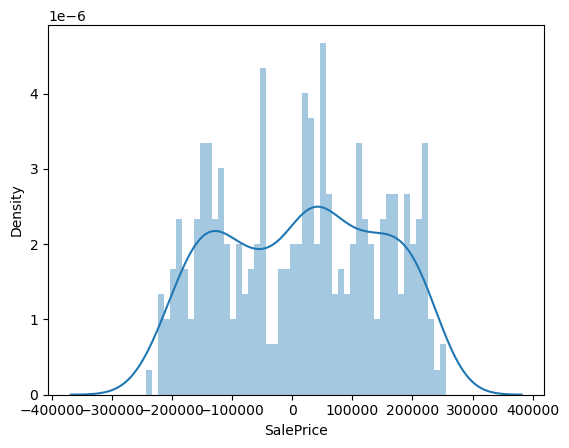

In [76]:
sns.distplot((y_test-predictions),bins=50)

In [78]:
sdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
sdf

,Coeff
OverallQual,-1459.961856
GrLivArea,-6.892231
YearBuilt,-42.215780
TotalBsmtSF,1.925401
FullBath,3065.523165
HalfBath,1160.527280
GarageCars,4953.207803
GarageArea,-20.477226
